In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/PRAKTIKUM6/data'

In [4]:
df = pd.read_csv(f"{path}/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Melihat jumlah baris dan kolom
print("Ukuran dataset:", df.shape)

Ukuran dataset: (1025, 14)


In [6]:
# Melihat tipe data dan missing value
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [7]:
# Melihat statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     

In [8]:
# Cek apakah ada missing value
print("\nJumlah missing value tiap kolom:")
print(df.isnull().sum())


Jumlah missing value tiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-4276828779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


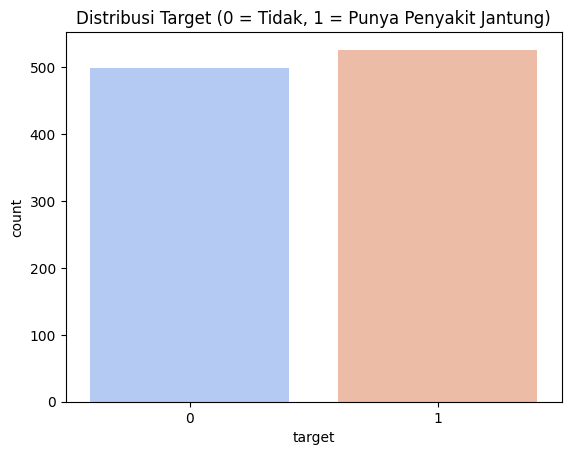

target
1    526
0    499
Name: count, dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Distribusi Target (0 = Tidak, 1 = Punya Penyakit Jantung)")
plt.show()

print(df['target'].value_counts())

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Buat Model SVM & Evaluasi
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Buat model SVM
model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 92.68 %

Confusion Matrix:
 [[91  9]
 [ 6 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



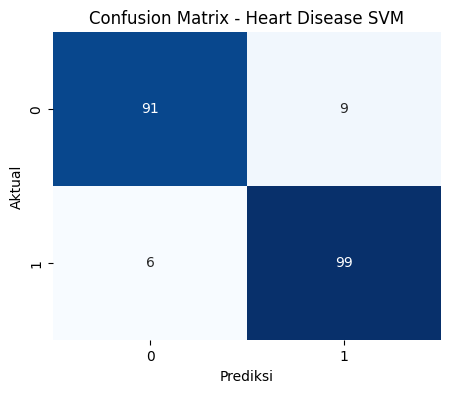

Akurasi Model: 92.68 %


In [13]:
# Confusion Matrix (dalam bentuk grafik)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Heart Disease SVM")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

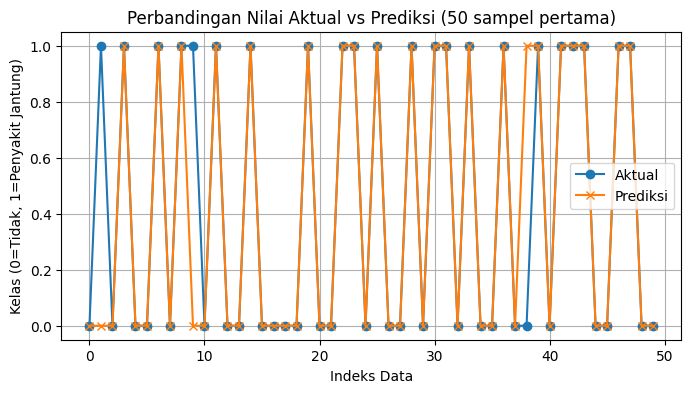

In [14]:
# Buat dataframe hasil prediksi
hasil = pd.DataFrame({
    'Aktual': y_test.values,
    'Prediksi': y_pred
}).reset_index(drop=True)

# Visualisasi perbandingan
plt.figure(figsize=(8,4))
plt.plot(hasil['Aktual'].values[:50], label='Aktual', marker='o')
plt.plot(hasil['Prediksi'].values[:50], label='Prediksi', marker='x')
plt.title("Perbandingan Nilai Aktual vs Prediksi (50 sampel pertama)")
plt.xlabel("Indeks Data")
plt.ylabel("Kelas (0=Tidak, 1=Penyakit Jantung)")
plt.legend()
plt.grid(True)
plt.show()

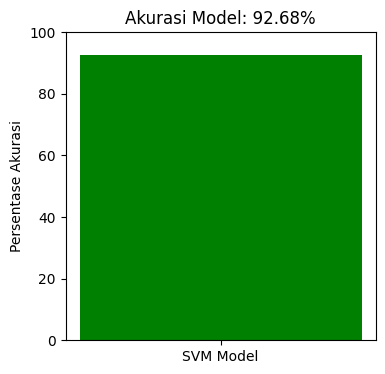

In [15]:
# Visualisasi Akurasi Model
akurasi = round(accuracy_score(y_test, y_pred)*100, 2)
plt.figure(figsize=(4,4))
plt.bar(['SVM Model'], [akurasi], color='green')
plt.ylim(0,100)
plt.title(f"Akurasi Model: {akurasi}%")
plt.ylabel("Persentase Akurasi")
plt.show()